In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
os.chdir("../")

In [12]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import util

# Analysis of answers for `edge_length_prompts`


## Load and clean the answers

In [4]:
answer_dir = os.path.join("answers", "edge_length_prompts")

In [5]:
answer_is_number = {}
answer_not_number = {}
number_r = re.compile(r"^\d*[.,]?\d*$")

for answer_file in sorted(os.listdir(answer_dir)):
    answer_file_path = os.path.join(answer_dir, answer_file)

    answer_str = open(answer_file_path, "r").read().strip()
    answer_str = answer_str.split()

    found_digit = False
    for sub_str in answer_str:
        if number_r.match(sub_str):
            answer_is_number[answer_file] = float(sub_str)
            found_digit = True

    if not found_digit:
        answer_not_number[answer_file] = answer_str

print("Answer is a number:", len(answer_is_number))
print("Answer is not a number:", len(answer_not_number))


Answer is a number: 213
Answer is not a number: 0


Up to now we only checked if the returned string contained a number. We can now look for the presence of integers (expected) or floats.

In [6]:
answer_integer = {}
answer_float = {}
for answer_file, answer in answer_is_number.items():
    if answer.is_integer():
        answer_integer[answer_file] = int(answer)
    else:
        answer_float[answer_file] = answer

print("Answer is an Integer:", len(answer_integer))
print("Answer is a Float:", len(answer_float))

Answer is an Integer: 213
Answer is a Float: 0


rome/grafo2931.11.graphml
12
[(0, 6), (6, 1), (6, 10), (10, 7), (10, 4), (10, 2), (10, 3), (3, 8), (3, 9), (4, 9), (2, 8), (2, 5)]
12
rome/grafo2812.11.graphml
11
[(0, 6), (6, 1), (1, 7), (1, 8), (7, 2), (7, 4), (8, 3), (3, 9), (4, 9), (3, 10), (10, 5)]
11
rome/grafo2953.11.graphml
10
[(0, 5), (5, 1), (1, 6), (1, 7), (6, 2), (6, 3), (3, 10), (3, 4), (4, 8), (4, 9)]
10
rome/grafo2964.11.graphml
12
[(0, 9), (0, 4), (9, 3), (4, 1), (4, 2), (1, 6), (3, 6), (1, 5), (2, 5), (1, 7), (1, 8), (2, 10)]
12
rome/grafo376.10.graphml
9
[(0, 6), (6, 1), (1, 7), (7, 2), (7, 3), (3, 8), (3, 9), (8, 4), (9, 5)]
9
rome/grafo857.11.graphml
10
[(0, 9), (9, 7), (7, 1), (1, 6), (6, 2), (6, 5), (5, 3), (5, 10), (3, 8), (8, 4)]
10
rome/grafo2129.11.graphml
13
[(0, 1), (0, 3), (3, 2), (1, 6), (1, 4), (3, 4), (1, 7), (1, 8), (1, 9), (4, 5), (6, 5), (6, 10), (4, 10)]
13
rome/grafo267.11.graphml
11
[(0, 6), (0, 7), (0, 8), (6, 1), (6, 2), (7, 5), (7, 3), (8, 3), (8, 9), (9, 4), (4, 10)]
11
rome/grafo532.11.graphml

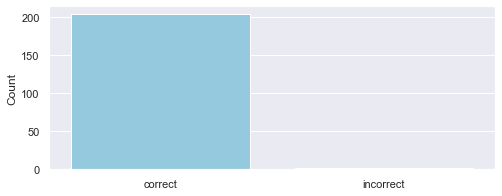

In [41]:
data = {}
data["correct"] = 0
data["incorrect"] = 0

for f in util.read_files(base_path = "rome"):
    print(f['filename'])
    if f['filename'] == "rome/grafo758.10.graphml": continue

    print(answer_integer[f['filename'].split("/")[1].replace(".graphml", ".txt")])
    el = f['edge_list']
    nr = util.bfs(el, 0)
    clean_el = util.cleanup_edges(el, util.bfs(el, 0))

    print(clean_el)

    if (util.count_edge_length(clean_el) == answer_integer[f['filename'].split("/")[1].replace(".graphml", ".txt")]):
        data["correct"] += 1
    else: data["incorrect"] += 1
    
    print(util.count_edge_length(clean_el))

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the dictionary to a Pandas DataFrame for plotting
df = pd.DataFrame.from_dict(data, orient='index', columns=['Value'])

sns.set(rc={'figure.figsize':(8,3)})

# Use Seaborn to create a bar chart
sns.barplot(x=df.index, y='Value', data=df, color='skyblue')

# Set the labels for the x and y axes
# plt.xSabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()